# <b>Gautam Bhagat<b>

## <i>Data Science & Business Analytics Task #01</i>
## <i>Prediction Using Supervised ML</i>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading Data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<b>Independent and Dependent Values stored in Variables X , y respectively</b>

In [4]:
X = data["Hours"].values.reshape(-1,1)
y = data["Scores"].values.reshape(-1,1)

<h4><b>Visualizing Data</b></h4>

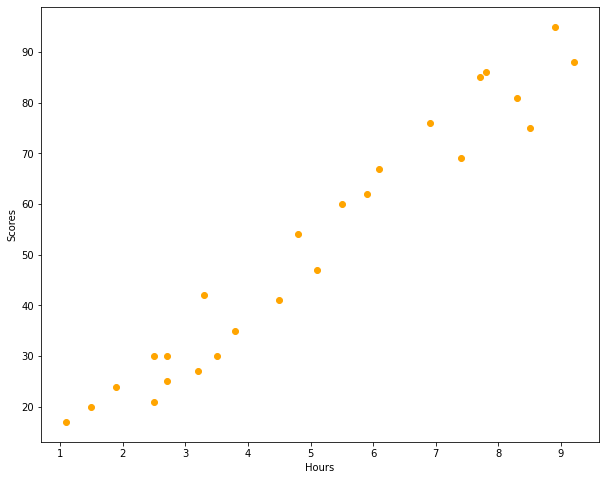

In [5]:
plt.figure(figsize=(10,8))
plt.scatter(X,y,c="orange")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

#### <b>Splitting Train and Test Data using SK-Learn</b>

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

#### <b>Creating Regression Object</b>

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
print("Linear Regression Object Created !!")

Linear Regression Object Created !!


#### <b>Training the Algorithm</b>

In [8]:
reg.fit(X_train,y_train)
print("Training Complete !!")

Training Complete !!


### <b>Predicting and Plotting the Regression Line</b>

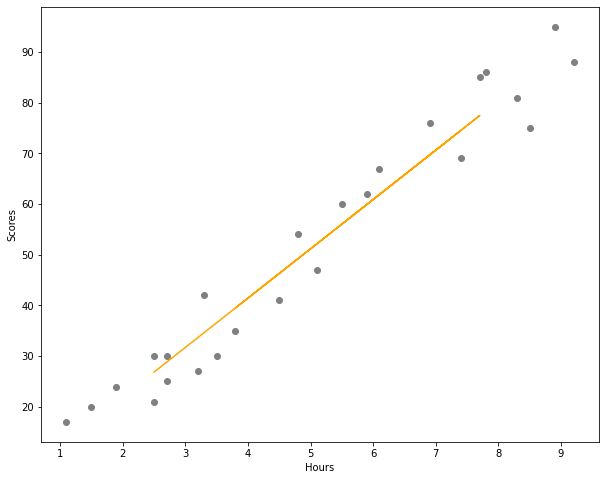

In [9]:
y_pred = reg.predict(X_test)
plt.figure(figsize=(10,8))
plt.scatter(X,y,c="grey")
plt.plot(X_test,
        y_pred,
        c="orange",
        linewidth=1.5)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [10]:
reg_coef = reg.coef_[0][0]
print("REG COEF : "+str(reg_coef))
reg_intercept = reg.intercept_[0]
print("REG INTERCEPT : "+str(reg_intercept))

REG COEF : 9.733307053186977
REG INTERCEPT : 2.512129298320076


#### <b>Comparing Actual and Predicted Values</b>

In [11]:
actual = sum(y_test.tolist(),[])
predicted = sum(y_pred.tolist(),[])
df = pd.DataFrame({' ACTUAL ': actual,' PREDICTED ':predicted})
df

,ACTUAL,PREDICTED
0,30,26.845397
1,85,77.458594
2,35,39.498696
3,69,74.538601
4,60,56.045318


#### <b>Calculating R2 Score</b>

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9377551740781869

### Accuracy Achieved : <b>93%<b>

### <b>Given Question :</b>
### <b><i>What will be the predicted score if student studies 9.25 hrs/day ?</i></b>

In [13]:
hours = float(input("Enter No.of Hours Student Studies : "))
predicted_score = reg.predict([[hours]])
print(f"No of Hours     : {hours} hrs/day")
print(f"Predicted Score : {predicted_score[0][0]}")

Enter No.of Hours Student Studies : 9.25
No of Hours     : 9.25 hrs/day
Predicted Score : 92.54521954029961


<h4>Answer : </h4>
<h3>Therefore, If a student Studies for 9.25 hrs/day the predicted score is <b>92.55</b></h3>

<b>Evaluting Model</b>

In [14]:
from sklearn import metrics
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test,y_pred))
print("Max Error : ", metrics.max_error(y_test,y_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test,y_pred))

Mean Absolute Error :  4.937597792467706
Max Error :  7.541406392140203
Mean Squared Error :  26.67564259705224
